## Setup StreetFighter

In [1]:
!pip install -q gym gym-retro

In [1]:
import matplotlib.pyplot as plt #for plotting images
import time #to slow down game

In [2]:
#import retro to play street fighter using a ROM
import retro

In [3]:
#see the different retro games
retro.data.list_games()[:5]

['1942-Nes',
 '1943-Nes',
 '3NinjasKickBack-Genesis',
 '8Eyes-Nes',
 'AaahhRealMonsters-Genesis']

In [4]:
env=retro.make(game='StreetFighterIISpecialChampionEdition-Genesis')

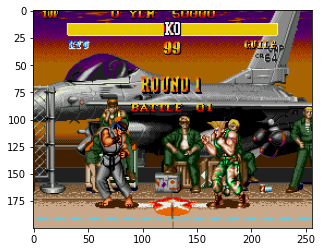

In [26]:
plt.imshow(env.reset())

In [24]:
env.close() #have to close everytime or else it will throw an error (cannot run multiple games at the same time)

In [8]:
print(env.action_space) # 12 positions containing zero or one (the potential actions the RL agent can take)
# print(env.observation_space)
print(env.action_space.sample())
print(env.observation_space.sample().shape) #getting back an image of 200x256x3

MultiBinary(12)
[1 1 1 1 0 0 0 0 1 1 0 1]
(200, 256, 3)


In [9]:
env=retro.make(game='StreetFighterIISpecialChampionEdition-Genesis')
obs=env.reset()
done=False
eachreward=[]
for game in range(1):
    while not done:
        if done:
            obs=env.reset()
        env.render()
        obs,reward,done,info=env.step(env.action_space.sample())
        eachreward.append(reward)
        time.sleep(0.002)
print(eachreward[:20]) # not getting much reward , difficult to train with sparse reward

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [10]:
env.close()

In [11]:
env=retro.make(game='StreetFighterIISpecialChampionEdition-Genesis')
obs=env.reset()
obs,reward,done,info=env.step(env.action_space.sample())
print(info)
# print(obs)
print(reward)
print(done)

{'continuetimer': 0, 'enemy_matches_won': 0, 'enemy_health': 176, 'health': 176, 'matches_won': 0, 'score': 0}
0.0
False


In [12]:
env.close() 

## Setup Environment


### Preprocess the game environment
- Calculate the changes in pixels from our current frame versus our lst frame. This is in order to capture movement.
- Drop some pixels to train a lil faster(by greyscaling and reshaping)

In [5]:
from gym import Env #Import environment base class for a wrapper
from gym.spaces import MultiBinary,Box #import the space shapes for the environment

import numpy as np #for calculating frame delta
import cv2 #import opencv for greyscaling

In [6]:
#create custom environment
class StreetFighter(Env):
    def __init__(self):
        pass
    def reset(self):
        pass
    def preprocess(self, observation):
        pass
    def step(self, action):
        pass
    def render(self):
        pass
    def close(self):
        pass

In [15]:
env.close()

In [7]:
class StreetFighter(Env):
    def __init__(self):
        super().__init__()
        self.observation_space=Box(low=0, high=255, shape=(84,84,1),dtype=np.uint8) #shape(200,256,3) to (84,84,1)
        self.action_space=MultiBinary(12)
        self.game=retro.make(game='StreetFighterIISpecialChampionEdition-Genesis',
                             use_restricted_actions=retro.Actions.FILTERED)
    def reset(self):
        obs=self.game.reset()
        obs=self.preprocess(obs)
        self.previous_frame=obs
        
        self.score=0
        return obs 
    
    def preprocess(self, observation):
        gray=cv2.cvtColor(observation,cv2.COLOR_BGR2GRAY)
        resize=cv2.resize(gray,(84,84),interpolation=cv2.INTER_CUBIC)
        channels=np.reshape(resize,(84,84,1))
        return channels

    def step(self, action):
        obs,reward, done, info=self.game.step(action)
        obs=self.preprocess(obs)
        
        frame_delta=obs-self.previous_frame
        self.previous_frame=obs
        
        #reshape the reward function
        reward=info["score"]-self.score
        self.score=info["score"]
        
        return frame_delta, reward, done, info
    
    def render(self,*args,**kwargs): #I forgot what is args and kwargs :/ (for managing inheritance)
        self.game.render()
        
    def close(self):
        self.game.close()

In [17]:
env=retro.make(game='StreetFighterIISpecialChampionEdition-Genesis')
obs=env.reset()

In [18]:
env.close() 

(84, 84)
(84, 84, 1)


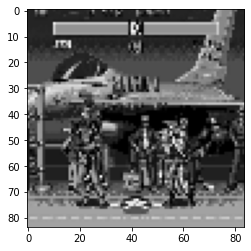

In [19]:
gray=cv2.cvtColor(obs,cv2.COLOR_BGR2GRAY)
# bgr2rgb=cv2.cvtColor(gray,cv2.COLOR_BGR2RGB) # changes from 1 channel to 3 channels
resize=cv2.resize(gray,(84,84),interpolation=cv2.INTER_CUBIC)
channels=np.reshape(resize,(84,84,1))
print(resize.shape)
print(channels.shape)
plt.imshow(resize)
plt.imshow(cv2.cvtColor(resize,cv2.COLOR_BGR2RGB))

In [6]:
env=StreetFighter()

In [7]:
print(env.action_space)
print(env.action_space.sample())
print(env.observation_space.shape)

MultiBinary(12)
[1 1 0 1 1 1 1 1 1 0 0 0]
(84, 84, 1)


In [22]:
obs=env.reset()
done=False
for episode in range(1):
    while not done:
        if done:
            obs=env.reset()
        env.render()
        obs,reward,done,info=env.step(env.action_space.sample())
        time.sleep(0.01)
        if reward>0:
            print(reward)
    

500
100
100
1000
500
300
100
100
100
100
100
100
100
100
100
100
100
100
100
1000
10000
10000
500
500
1000
500
500


In [8]:
env.close()

In [24]:
env=StreetFighter()

In [25]:
for episode in range(1):
    done=False
    score=[]
    obs=env.reset()
    while not done:
        env.render()
        action=env.action_space.sample()
        obs, reward, done, info=env.step(action)
        if reward > 0:
            score.append(reward)
            
env.close()

In [26]:
score

[500,
 500,
 1000,
 500,
 500,
 3000,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 10000,
 500,
 500,
 500,
 500,
 1000,
 500,
 500,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 1000,
 1000,
 1000,
 1000,
 1000,
 100,
 1000,
 500,
 500,
 500,
 500,
 100,
 100,
 100,
 100,
 100,
 10000,
 500,
 100,
 1000,
 1000,
 500]

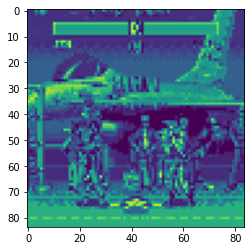

In [28]:
env=StreetFighter()
obs=env.reset()
plt.imshow(obs)

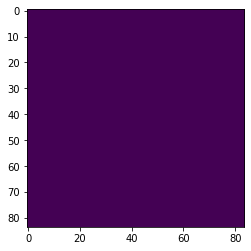

In [29]:
obs,reward,done,info=env.step(env.action_space.sample())
plt.imshow(obs) #showing the frame delta : if nothing else in the frame change, we will get a pure purple image

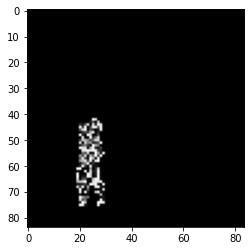

In [30]:
obs,reward,done,info=env.step(env.action_space.sample())
plt.imshow(cv2.cvtColor(obs,cv2.COLOR_BGR2RGB)) # change from BGR to RGB (purple color will change back to black)

## Hyperparameter tuning

In [31]:
!pip install -q torch torchvision torchaudio

In [32]:
!pip install -q "stable-baselines3[extra]" optuna

In [8]:
import os
import optuna

from stable_baselines3 import PPO #using PPO algorithm
from stable_baselines3.common.evaluation import evaluate_policy # for metric calculation
from stable_baselines3.common.monitor import Monitor #logging the 
from stable_baselines3.common.vec_env import DummyVecEnv, VecFrameStack #to vectorize and frame stack

In [9]:
LOG_DIR="./logs/"

OPT_DIR="./opt/" 

In [43]:
save_path=os.path.join(OPT_DIR,f"trial_{1}_best_model")
save_path

'./opt/trial_1_best_model'

In [10]:
# function to return test hyperparameters - define the object function
def optimize_ppo(trial):
    return {
        "n_steps":trial.suggest_int("n_steps",2048,8192),
        "gamma":trial.suggest_loguniform("gamma",0.8,0.9999),
        "learning_rate":trial.suggest_loguniform("learning_rate",1e-5,1e-4),
        "clip_range":trial.suggest_uniform("clip_range",0.1,0.4),
        "gae_lambda":trial.suggest_uniform("gae_lambda",0.8,0.99)
    }

In [23]:
# run a training loop and return mean reward
def optimize_agent(trial):
    try:
        model_params=optimize_ppo(trial)
        
        env=StreetFighter()
        env=Monitor(env,LOG_DIR)
        env=DummyVecEnv([lambda:env])
        env=VecFrameStack(env,4,channels_order="last")
        
        model=PPO("CnnPolicy",env,tensorboard_log=LOG_DIR,verbose=0,**model_params) #create PPO model
        model.learn(total_timesteps=30000)
        
        mean_reward,_=evaluate_policy(model,env,n_eval_episodes=5) #evaluate model
        env.close()
        env.close()
        
        save_path=os.path.join(OPT_DIR,f"trial_{trial.number}_best_model")
        model.save(save_path)
        
        return mean_reward
    
    except Exception as e:
        return -1000


In [11]:
def optimize_agent(trial):
    model_params=optimize_ppo(trial)

    env=StreetFighter()
    env=Monitor(env,LOG_DIR)
    env=DummyVecEnv([lambda:env])
    env=VecFrameStack(env,4,channels_order="last")

    model=PPO("CnnPolicy",env,tensorboard_log=LOG_DIR,verbose=0,**model_params) #create PPO model
    model.learn(total_timesteps=300)

    mean_reward,_=evaluate_policy(model,env,n_eval_episodes=1) #evaluate model
    env.close()

    save_path=os.path.join(OPT_DIR,f"trial_{trial.number}_best_model")
    model.save(save_path)

    return mean_reward


In [27]:
env.close()


NameError: name 'env' is not defined

In [14]:
study=optuna.create_study(direction="maximize")
study.optimize(optimize_agent,n_trials=1,n_jobs=1) 
#[Errno 2] No such file or directory: './logs/.monitor.csv'
#RuntimeError: Cannot create multiple emulator instances per process, 
#make sure to call env.close() on each environment before creating a new  
#finally workingg :')

[I 2022-08-19 09:36:52,800] A new study created in memory with name: no-name-2ad624eb-e4f3-4645-aa1a-18a9764765a0
/Users/elizabeth/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/stable_baselines3/ppo/ppo.py:140: UserWarning: You have specified a mini-batch size of 64, but because the `RolloutBuffer` is of size `n_steps * n_envs = 7322`, after every 114 untruncated mini-batches, there will be a truncated mini-batch of size 26
We recommend using a `batch_size` that is a factor of `n_steps * n_envs`.
Info: (n_steps=7322 and n_envs=1)
  warnings.warn(
/Users/elizabeth/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/stable_baselines3/common/save_util.py:276: UserWarning: Path 'opt' does not exist. Will create it.
  warnings.warn(f"Path '{path.parent}' does not exist. Will create it.")
[I 2022-08-19 09:38:19,273] Trial 0 finished with value: 2000.0 and parameters: {'n_steps': 7322, 'gamma': 0.8139414448416995, 'learning_rate': 7.764982237420267e-05, 'clip_ran

In [14]:
env=StreetFighter()

RuntimeError: Cannot create multiple emulator instances per process, make sure to call env.close() on each environment before creating a new one

In [13]:
env.close() #???

In [15]:
study.best_params

{'n_steps': 7322,
 'gamma': 0.8139414448416995,
 'learning_rate': 7.764982237420267e-05,
 'clip_range': 0.35928195213371306,
 'gae_lambda': 0.8835264365987319}

In [16]:
study.best_trial

FrozenTrial(number=0, values=[2000.0], datetime_start=datetime.datetime(2022, 8, 19, 9, 36, 52, 803194), datetime_complete=datetime.datetime(2022, 8, 19, 9, 38, 19, 273388), params={'n_steps': 7322, 'gamma': 0.8139414448416995, 'learning_rate': 7.764982237420267e-05, 'clip_range': 0.35928195213371306, 'gae_lambda': 0.8835264365987319}, distributions={'n_steps': IntUniformDistribution(high=8192, low=2048, step=1), 'gamma': LogUniformDistribution(high=0.9999, low=0.8), 'learning_rate': LogUniformDistribution(high=0.0001, low=1e-05), 'clip_range': UniformDistribution(high=0.4, low=0.1), 'gae_lambda': UniformDistribution(high=0.99, low=0.8)}, user_attrs={}, system_attrs={}, intermediate_values={}, trial_id=0, state=TrialState.COMPLETE, value=None)

## Setup Callback

In [17]:
from stable_baselines3.common.callbacks import BaseCallback

In [18]:
class TrainAndLoggingCallback(BaseCallback):

    def __init__(self, check_freq, save_path, verbose=1):
        super(TrainAndLoggingCallback, self).__init__(verbose)
        self.check_freq = check_freq
        self.save_path = save_path

    def _init_callback(self):
        if self.save_path is not None:
            os.makedirs(self.save_path, exist_ok=True)

    def _on_step(self):
        if self.n_calls % self.check_freq == 0:
            model_path = os.path.join(self.save_path, 'best_model_{}'.format(self.n_calls))
            self.model.save(model_path)

        return True

In [19]:
CHECKPOINT_DIR="./train/"

In [34]:
callback = TrainAndLoggingCallback(check_freq=1000, save_path=CHECKPOINT_DIR)

## Train Model

In [35]:
env.close()

In [36]:
env=StreetFighter()
env=Monitor(env,LOG_DIR)
env=DummyVecEnv([lambda:env])
env=VecFrameStack(env,4,channels_order="last")

In [37]:
model_params={
        "n_steps":7516,
        "gamma":0.908517,
        "learning_rate":5.02771e-05,
        "clip_range":0.39105,
        "gae_lambda":0.837663
}

In [38]:
model_params["n_steps"]=7488
model_params

{'n_steps': 7488,
 'gamma': 0.908517,
 'learning_rate': 5.02771e-05,
 'clip_range': 0.39105,
 'gae_lambda': 0.837663}

In [39]:
model=PPO("CnnPolicy", env, tensorboard_log=LOG_DIR,verbose=1,**model_params)

Using cpu device
Wrapping the env in a VecTransposeImage.


In [40]:
model.learn(total_timesteps=3000,callback=callback)

Logging to ./logs/PPO_11
-----------------------------
| time/              |      |
|    fps             | 425  |
|    iterations      | 1    |
|    time_elapsed    | 17   |
|    total_timesteps | 7488 |
-----------------------------


In [26]:
# move to logs folder, run below command to see the logs in tensorboard
# tensorboard --logdir=.

## Evaluate Model

In [41]:
model=PPO.load("./train/best_model_6000.zip")

In [42]:
mean_reward,_=evaluate_policy(model,env,render=True,n_eval_episodes=1)

In [44]:
mean_reward,_

(4400.0, 0.0)

## Test Out Model

In [45]:
obs=env.reset()

In [46]:
obs.shape

(1, 84, 84, 4)

In [54]:
array,b=model.predict(obs)
print(array)
print(b) #what is b?

[[1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0.]]
None


In [58]:
for episode in range(1):
    obs=env.reset()
    done=False
    while not done:
        env.render()
        action=model.predict(obs)[0]
        obs,reward,done,info=env.step(action)
        time.sleep(0.01)
        if reward>0:
            print(reward)

[100.]
[300.]
[1000.]
[500.]
[300.]
[500.]
[1000.]
[1000.]
[300.]


In [ ]:
for episode in range(1):
    done=False
    score=[]
    obs=env.reset()
    while not done:
        env.render()
        action=env.action_space.sample()
        obs, reward, done, info=env.step(action)
        if reward > 0:
            score.append(reward)
            
env.close()